In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import numpy as np
from scipy.fftpack import dctn, idctn

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exploring DCT

In [113]:
patch_xy = 512
frames_per_patch = 64
dataset = NoisyDataset(
    "oabf_astro",
    patch_xy=patch_xy,
    frames_per_patch=frames_per_patch,
    augument=False,
    max_frames=128,
    overlap=0,
    verbose=True,
)

The dataset has 1z x 1y x 1x = 1 samples


In [114]:
i = np.random.randint(len(dataset))
even, odd = dataset[i]
patch = even.numpy()[0]

0 --> [0:128 z, 0:512 y, 0:512 x]


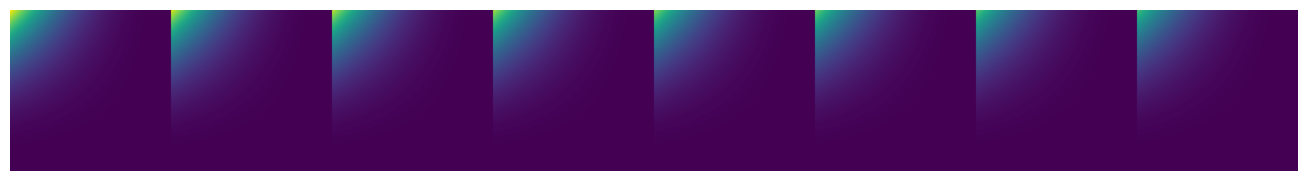

(64, 512, 512)

In [181]:
size = patch_xy
k = size - np.arange(size)
k = k.reshape(-1, 1, 1) * k.reshape(1, -1, 1) * k.reshape(1, 1, -1)
k = k[:frames_per_patch]
k = k / np.max(k)
k = k**3

imshow(np.concatenate([_ for _ in k[::8]], axis=1), size=18)
k.shape

In [182]:
patch_dct = dctn(patch, type=2, norm="ortho")
patch_idct = idctn(patch_dct, type=2, norm="ortho")
patch_denoised=idctn(patch_dct*k, type=2, norm="ortho")

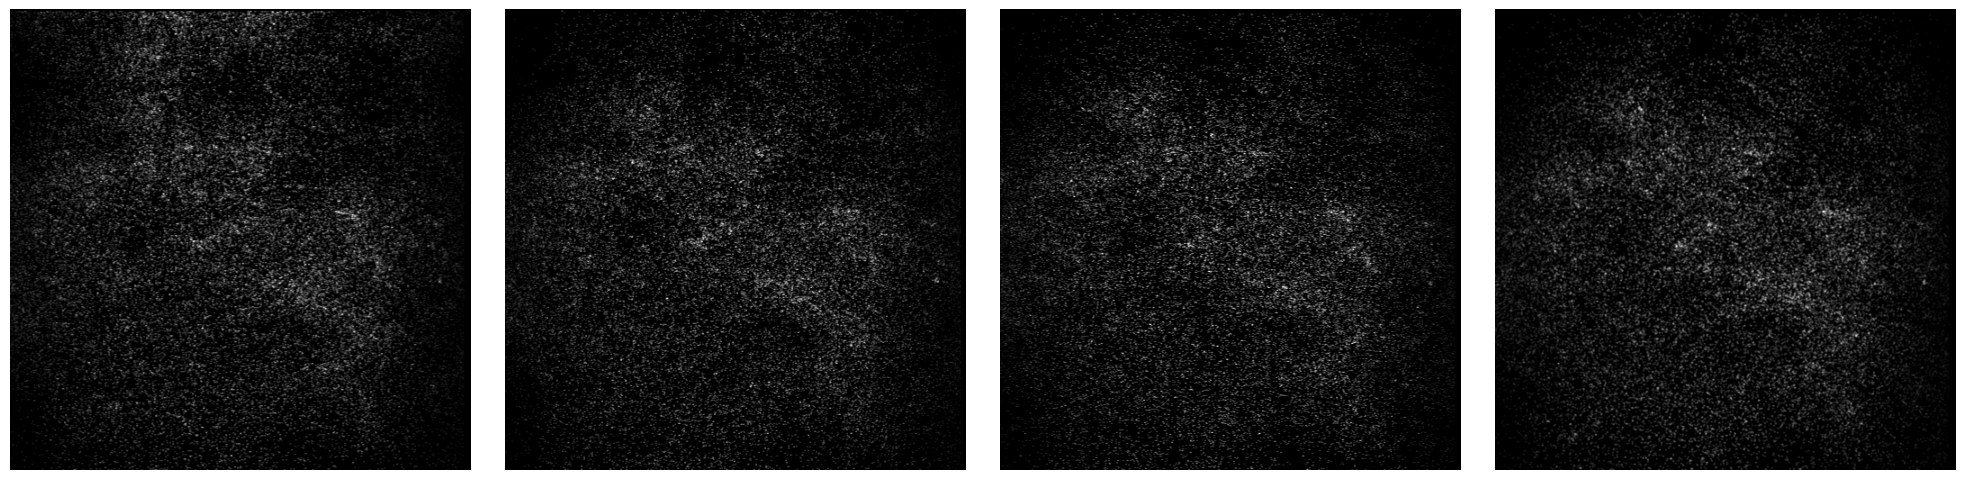

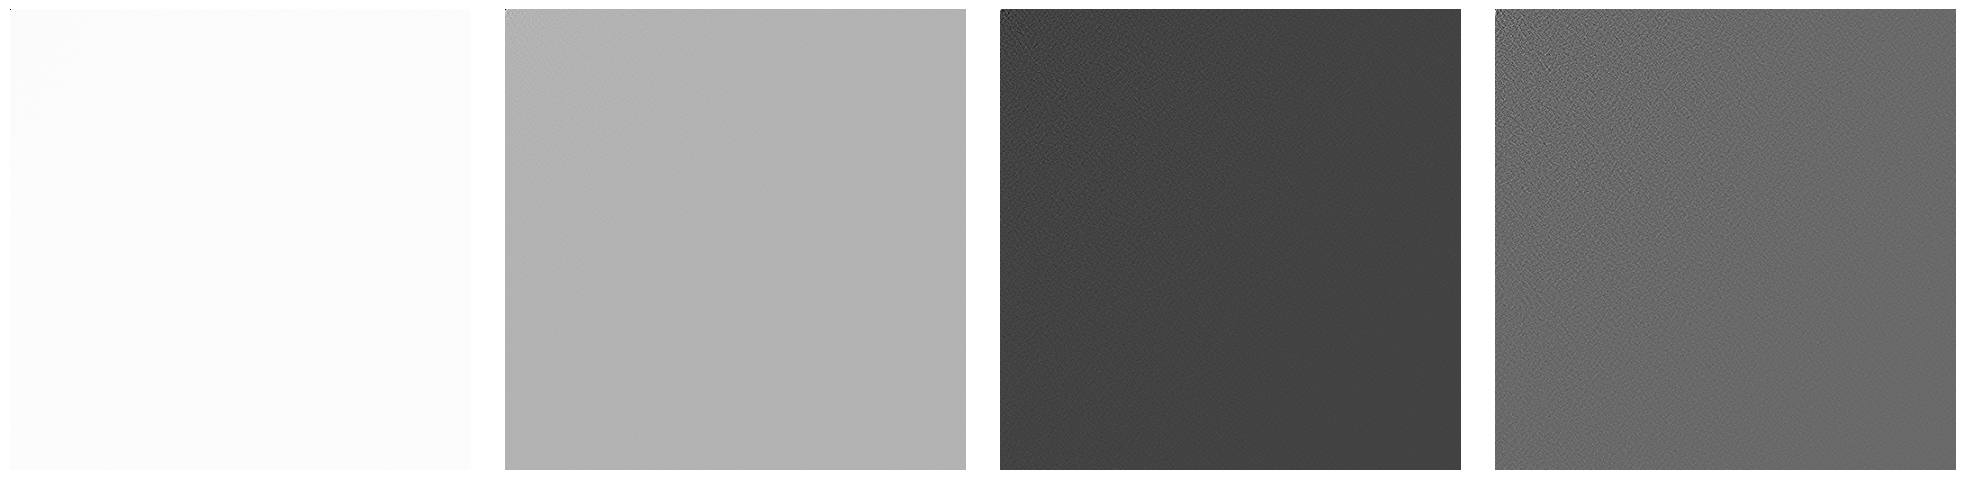

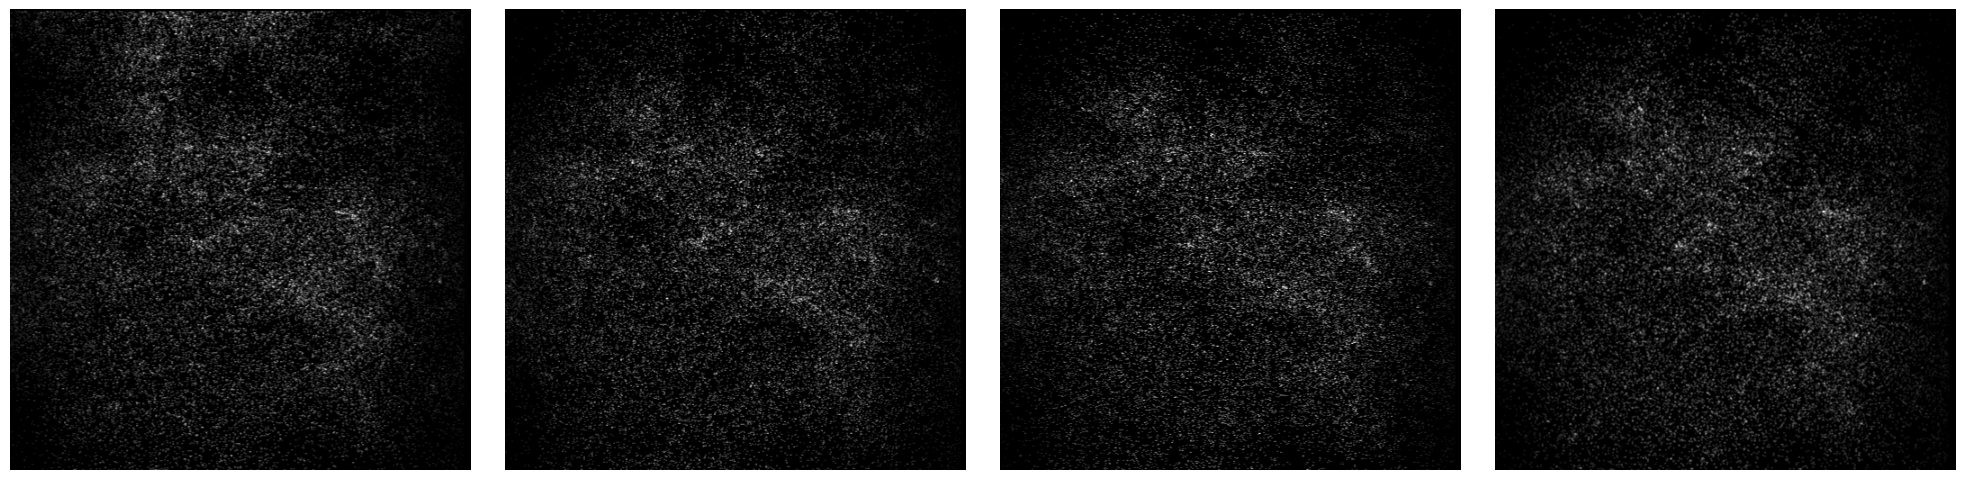

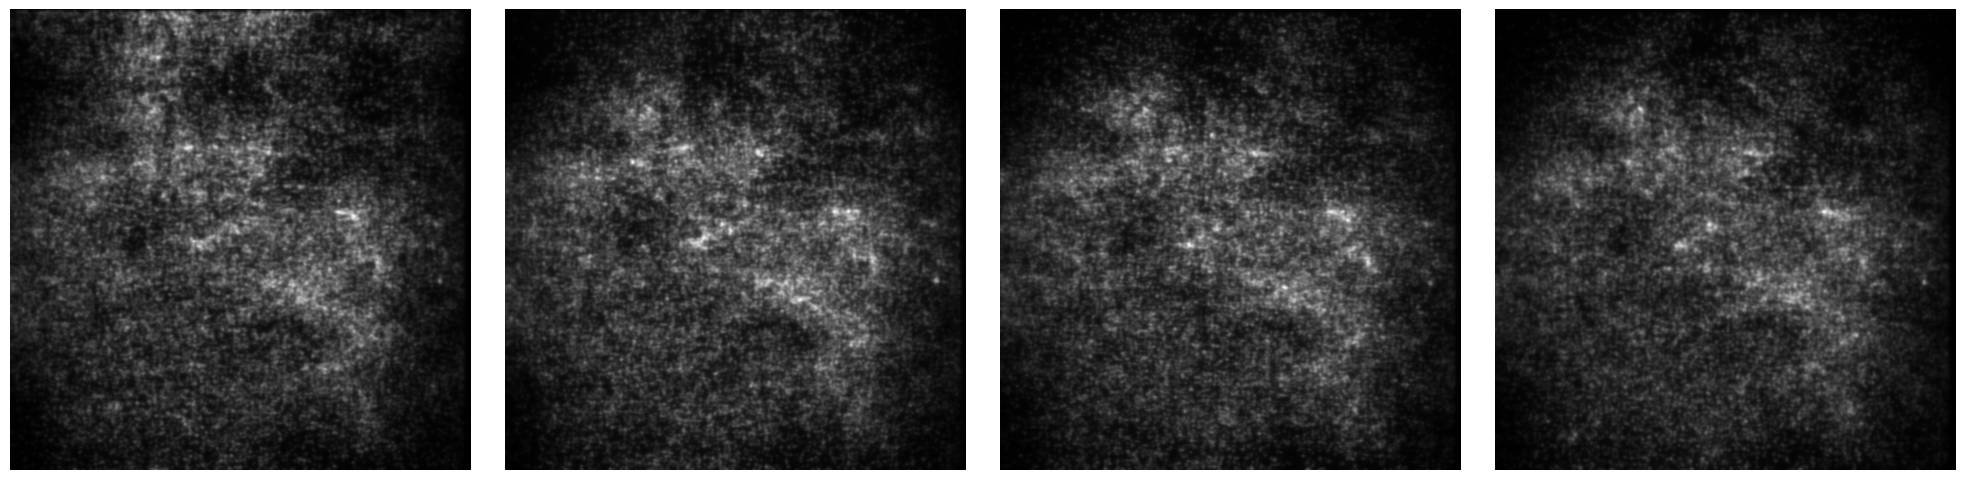

In [185]:
max_frames=4
imshow([_ for _ in patch[:max_frames]], cmap="grey",size=5, cols=max_frames)
imshow([_ for _ in patch_dct[:max_frames]], cmap="grey",size=5, cols=max_frames)
imshow([_ for _ in patch_idct[:max_frames]], cmap="grey",size=5, cols=max_frames)
imshow([_ for _ in patch_denoised[:max_frames]], cmap="grey",size=5, cols=max_frames)
